# Q) Do the following in the iris dataset
#     1. Read the dataset to python environment
#     2. Do the necessary pre-processing steps
#     3. Find out which classification model gives the best result         (try all the classification algorithms discussed in the session)
*************

In [122]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn. metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


In [123]:
# loading the dataset into the python environment
data = pd.read_excel('C:/Users/Lenovo/Assignment/assignment 7/DATA/iris.xls')

In [124]:
# display the first 5 rows of the dataframe
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [125]:
# Print information about the dataframe 'data'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


~ 'Classification' is a categorical column of type object

### CHECKING FOR DUPLICATES

In [126]:
# check whether rows in the DataFrame are duplicated or not
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [127]:
# display the rows having duplicates 
data[data.duplicated()]

,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


~ From the above display, there are few rows that are having duplicate values

In [128]:
# remove duplicates and store it in a new dataframe
data1 = data.drop_duplicates(ignore_index=True)

In [129]:
# display the first 40 rows of the dataframe after removing the duplicates
data1.head(40)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### CHECKING FOR NULL VALUES

In [130]:
# number of null values in the dataframe 
data1.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

~ From the above display, SL, SW and  PL are having null values

In [131]:
# number of rows and columns of the dataframe 
data1.shape

(147, 5)

 ~It is having 147 rows and 5 columns

### HANDLING NULL VALUES

#### 1) SL

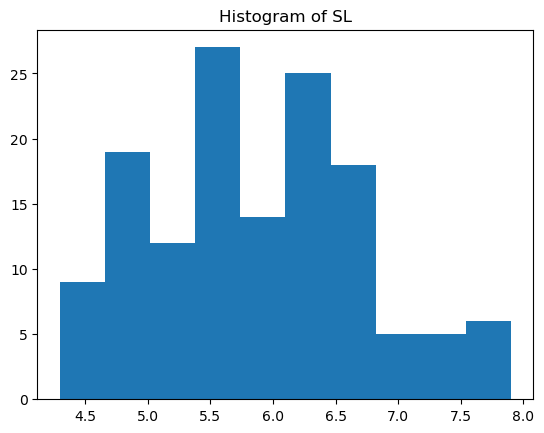

In [132]:
# plotting histogram for 'SL' column
plt.hist(data1['SL'])

# display title 
plt.title("Histogram of SL")

# display figure
plt.show()

~ The above histogram is skewed, hence using median to fill the missing values of 'SL'

#### 2) SW

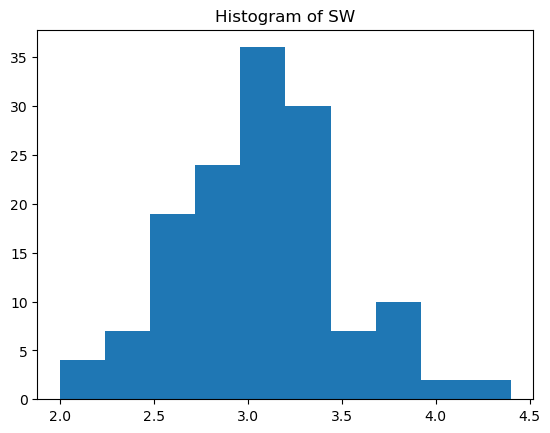

In [133]:
# plotting histogram for 'SW' column
plt.hist(data1['SW'])

# display title 
plt.title("Histogram of SW")

# display figure
plt.show()

~ The above histogram is skewed, hence using median to fill the missing values of 'SW'

#### 3) PL

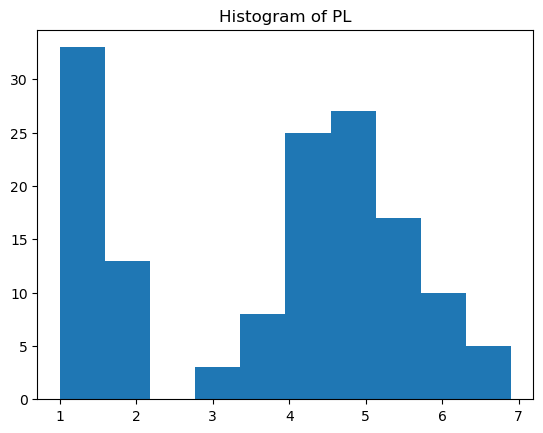

In [134]:
# plotting histogram for 'PL' column
plt.hist(data1['PL'])

# display title 
plt.title("Histogram of PL")

# display figure
plt.show()

~ The above histogram is skewed, hence using median to fill the missing values of 'PL'

In [135]:
# fill NaN values under 'SL','SW', 'PL' columns with its median using for loop
for i in ['SL','SW', 'PL']:
    data1[i] = data1[i].fillna(data1[i].median())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7432\1444685808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[i] = data1[i].fillna(data1[i].median())


In [136]:
# number of null values in the dataframe 
data1.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [137]:
# display summary statistics of all numerical columns
data1.describe() 

,SL,SW,PL,PW
count,147.000000,147.000000,147.000000,147.000000
mean,5.866667,3.048980,3.804082,1.208844
std,0.809053,0.425291,1.723682,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### HANDLING OUTLIERS
~ Checking for outliers in 'SL', 'SW', 'PL', 'PW'

##### 'Outliers' in 'SL' column

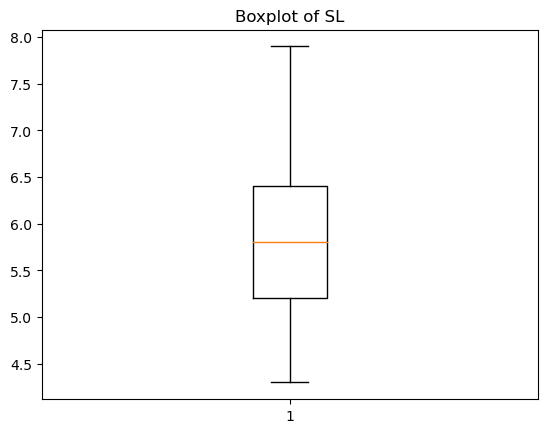

In [138]:
# Boxplot of 'SL' column to check outliers
plt.boxplot(data1['SL'])

# display title
plt.title("Boxplot of SL")

# display figures
plt.show()

~ No oultiers present in 'SL' column

##### 'Outliers' in 'SW' column


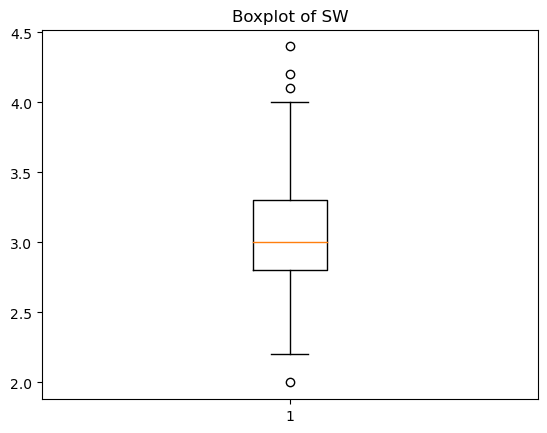

In [139]:
# Boxplot of 'SW' column to check outliers
plt.boxplot(data1['SW'])

# display title
plt.title("Boxplot of SW")

# display figures
plt.show()

~ Few oultiers present in 'SW' column

First, Second and Third Quartile of 'SW' column

In [140]:
# First Quartile of 'SW' column
Q1_sw = np.percentile(data1['SW'], 25, interpolation='midpoint')
f"First Quartile of 'SW' column = {Q1_sw}"

"First Quartile of 'SW' column = 2.8"

In [141]:
# Second Quartile of 'SW' column
Q2_sw = np.percentile(data1['SW'], 50, interpolation='midpoint')
f"Second Quartile of 'SW' column = {Q2_sw}"

"Second Quartile of 'SW' column = 3.0"

In [142]:
# Third Quartile of 'SW' column
Q3_sw = np.percentile(data1['SW'], 75, interpolation='midpoint')
f"Third Quartile of 'SW' column = {Q3_sw}"

"Third Quartile of 'SW' column = 3.3"

In [143]:
# (interquartile range) IQR of  'SW' column
IQR_sw = Q3_sw-Q1_sw
f"IQR of 'SW' column = {IQR_sw}"

"IQR of 'SW' column = 0.5"

find the lower whisker and upper whisker of 'SW' column

In [144]:
# lower whisker of 'SW'  column
low_sw = Q1_sw-1.5*IQR_sw 
f"lower whisker of 'SW'  column = {low_sw}"

"lower whisker of 'SW'  column = 2.05"

In [145]:
# upper whisker of 'SW' column
up_sw = Q3_sw+1.5*IQR_sw
f"upper whisker of 'SW' column = {up_sw}"

"upper whisker of 'SW' column = 4.05"

In [146]:
# to find the outliers  in 'SW' column and display it
outlier_sw = [] 
for x_sw in data1['SW']:
    if((x_sw>up_sw) or (x_sw<low_sw)):
        outlier_sw.append(x_sw)
f"Outliers of 'SW' column = {outlier_sw}"


"Outliers of 'SW' column = [4.4, 4.1, 4.2, 2.0]"

##### 'Outliers' in 'PL' column

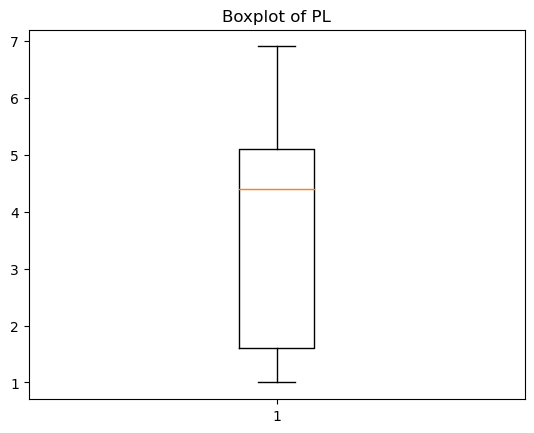

In [147]:
# Boxplot of 'PL' column to check outliers
plt.boxplot(data1['PL'])

# display title
plt.title("Boxplot of PL")

# display figures
plt.show()

~ No outliers in 'PL' column

##### 'Outliers' in 'PW' column

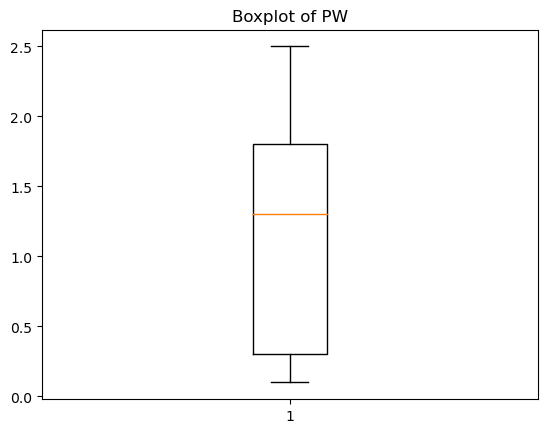

In [148]:
# Boxplot of 'PW' column to check outliers
plt.boxplot(data1['PW'])

# display title
plt.title("Boxplot of PW")

# display figures
plt.show()

~ No outliers in 'PW' column

### CORRELATION

In [149]:
# selecting  numerical variables for doing correlation
P = data1[['SL', 'SW', 'PL', 'PW']] 

In [150]:
# creating an instance for correlation
corrmatrix = P.corr()

# displaying the values of 'corrmatrix'
corrmatrix

,SL,SW,PL,PW
SL,1.000000,-0.098734,0.828716,0.799399
SW,-0.098734,1.000000,-0.405123,-0.337745
PL,0.828716,-0.405123,1.000000,0.934041
PW,0.799399,-0.337745,0.934041,1.000000


~ From the above display:
(a) 'PL' is having better positive correlation with 'SL'

In [151]:
# effect of classification on 'SL', 'SW', 'PL', 'PW' 
data1.groupby(['Classification']).agg(['min','max']) 


SL        SW        PL        PW     
                 min  max  min  max  min  max  min  max
Classification                                         
Iris-setosa      4.3  5.8  2.3  4.4  1.0  4.4  0.1  0.6
Iris-versicolor  4.9  7.0  2.0  3.4  3.0  5.1  1.0  1.8
Iris-virginica   5.6  7.9  2.2  3.8  4.4  6.9  1.4  2.5

~ For Iris-setosa, SL varying between 4.3 to 5.8, SW varying between 2.3 to 4.4, PL varying between 1.0 to 4.4 and  PW varying between 0.1 to 	0.6.

~ For Iris-versicolor, SL varying between 4.9 to 7.0, SW varying between 2.0 to 3.4, PL varying between 3.0 to 5.1 and  PW varying between 1.0 to	1.8.

~ For Iris-virginica, SL varying between 5.6 to	7.9, SW varying between 2.2	to 3.8, PL varying between 4.4 to 6.9 and  PW varying between 1.4 to 2.5.

~ PW is the smallest for Iris-setosa, and PL is the largest for Iris-virginica	

In [152]:
# mean of SL, SW, PL, PW according to classification and display it
mea_class = data1.loc[data1.SL != 0.0][['Classification', 'SL', 'SW', 'PL', 'PW']].groupby(['Classification']).mean()
mea_class

,SL,SW,PL,PW
Classification,,,,
Iris-setosa,5.0625,3.395833,1.589583,0.250000
Iris-versicolor,5.9200,2.790000,4.258000,1.326000
Iris-virginica,6.6000,2.973469,5.510204,2.028571


In [153]:
# count of data points under each classification
data1.groupby(['Classification']).agg({'Classification' :['count']})

,Classification
,count
Classification,
Iris-setosa,48
Iris-versicolor,50
Iris-virginica,49


### ENCODING

In [154]:
# unique values present in 'Classification' column
data1['Classification'].unique() 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [155]:
# creating an instance of LabelEncoder()
le = LabelEncoder() 

In [156]:
# applying label encoder to 'Classification' column
# Fit label encoder and tranform the values, store encoded labels back to  'Classification' column
data1['Classification'] = le.fit_transform(data1['Classification'])
data1['Classification']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7432\2494099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Classification'] = le.fit_transform(data1['Classification'])


0      0
1      0
2      0
3      0
4      0
      ..
142    2
143    2
144    2
145    2
146    2
Name: Classification, Length: 147, dtype: int32

In [157]:
# unique values present in encoded 'Classification' column
data1['Classification'].unique() 

array([0, 1, 2])

### SCALING

In [158]:
# preparing the dataframe to perform min max scaling and dropping the categorical column
S = data1.drop(['Classification'], axis = 1) 

# display first 5 rows under the dataframe S
S.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [159]:
# creating an instance for MinMaxScaler() and defining the range between 0 and 1 using feature_range
minmax = MinMaxScaler(feature_range=(0,1)) 

In [160]:
# Fit MinMaxScaler and tranform the scaled values to 'S1'
S1 = minmax.fit_transform(S)

# display the values of S1
S1

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.41666667, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.41666667, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [161]:
# converting back to a dataframe since it is array format and displaying it
S1 = pd.DataFrame(S1, columns=['SL', 'SW', 'PL', 'PW'])
S1

,SL,SW,PL,PW
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.416667,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
142,0.666667,0.416667,0.711864,0.916667
143,0.555556,0.208333,0.677966,0.750000
144,0.611111,0.416667,0.576271,0.791667
145,0.527778,0.583333,0.745763,0.916667


In [162]:
# display the summary statistics of all numerical columns after applying scaling
S1.describe()

,SL,SW,PL,PW
count,147.000000,147.000000,147.000000,147.000000
mean,0.435185,0.437075,0.475268,0.462018
std,0.224737,0.177204,0.292149,0.315781
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.576271,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


~ For all the columns, minimum value is 0 and maximum value is one after applying scaling

### SPLITTING THE DATA INTO FEATURES AND TARGET

-X indicates Fatures  = 'SL', 'SW', 'PL', 'PW' columns


-y indicates Target = 'Classification' column

In [163]:
# displaying features
X = S1
X

,SL,SW,PL,PW
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.416667,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
142,0.666667,0.416667,0.711864,0.916667
143,0.555556,0.208333,0.677966,0.750000
144,0.611111,0.416667,0.576271,0.791667
145,0.527778,0.583333,0.745763,0.916667


In [164]:
# displaying target
y = data1['Classification']
y

0      0
1      0
2      0
3      0
4      0
      ..
142    2
143    2
144    2
145    2
146    2
Name: Classification, Length: 147, dtype: int32

In [165]:
#  splitting the dataset into testing and training data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [166]:
# distribution of classes in actual test data of target
y_test.value_counts()

0    14
2    13
1    10
Name: Classification, dtype: int64

#### MODELS

#### 1) LOGISTIC REGRESSION

In [167]:
# creating an instance for LogisticRegression()
log_reg = LogisticRegression()

In [168]:
# fit the training data to the instance of LogisticRegression() and create a model
log_model = log_reg.fit(X_train, y_train)

In [169]:
# predict the target of the test data using the features of test data
log_ypred = log_model.predict(X_test)
log_ypred

array([2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2])

In [170]:
y_test

125    2
51     1
138    2
19     0
104    2
12     0
76     1
31     0
81     1
9      0
26     0
96     1
143    2
67     1
134    2
66     1
18     0
69     1
124    2
30     0
29     0
105    2
36     0
118    2
55     1
22     0
64     1
133    2
82     1
11     0
135    2
45     0
119    2
27     0
4      0
127    2
129    2
Name: Classification, dtype: int32

In [171]:
# displaying confusion matrix
log_conf = confusion_matrix(y_test, log_ypred)

In [172]:
# Creating a dataframe for an array-formatted Confusion matrix
conf_log_matrix = pd.DataFrame(log_conf,
                     index = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
                     columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

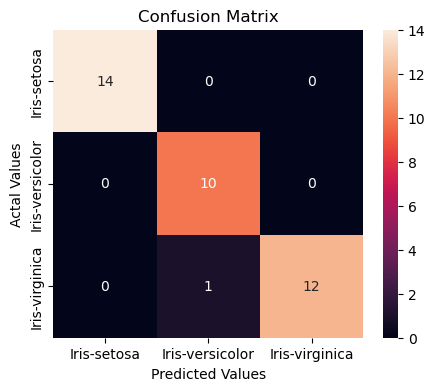

In [173]:
# Plotting the confusion matrix
plt.figure(figsize=(5,4))

# plotting heatmap
sns.heatmap(conf_log_matrix, annot=True)

# display title
plt.title('Confusion Matrix')

# display title on y axis
plt.ylabel('Actal Values')

# display title on x axis
plt.xlabel('Predicted Values')

# display figure
plt.show()

~ calculate the TP, TN, FP, FN values for the class 'Iris-setosa'
* TP: The actual value and predicted value should be the same.
TP = 14
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 0 = 0
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 0 = 0
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 10 + 0 + 1 + 12 =23

~ calculate the TP, TN, FP, FN values for the class 'Iris-versicolor'
* TP: The actual value and predicted value should be the same.
TP = 10
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 0 = 0
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 1 = 1
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 14 + 0 + 0 + 12 = 26

~ calculate the TP, TN, FP, FN values for the class 'Iris-virginica'
* TP: The actual value and predicted value should be the same.
TP = 12
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 1 = 1
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 0 = 0
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 14 + 0 + 0 + 10 = 24

In [174]:
# accuracy score
print(accuracy_score(y_test, log_ypred))

0.972972972972973


In [175]:
# precision score
print(precision_score(y_test, log_ypred, average='weighted'))

0.9754299754299754


In [176]:
# recall score
print(recall_score(y_test, log_ypred, average='weighted'))

0.972972972972973


In [177]:
# f1 score
print(f1_score(y_test, log_ypred, average='micro'))

0.972972972972973


#### 2) kNN MODEL

In [178]:
# take values from 3 to 14 and stores in array format
neighbors = np.arange(3,15) 
neighbors

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [179]:
# create an empty list to store accuracy
metric_k = [] 

# take values from 3 to 14 and store it in array format in 'neighbors' variable
neighbors = np.arange(3,15) 

# creating a loop for k and vary the values of k from 3 to 14
for k in neighbors:
    
    # for the first iteration k value = 3,  creating an instance
    knn = KNeighborsClassifier(n_neighbors=k) 
    
    # fitting the training data to the model and creating a model using the iteration
    knn_model = knn.fit(X_train, y_train) 
    
    # finding the predicted values of test data using features of test data for all iterations
    y_pred_knn = knn_model.predict(X_test) 
    
    # calculating accuracy of all iterations and storing in variable 
    knn_acc = accuracy_score(y_test, y_pred_knn) 
    
    # appending accuracy  of all iterations to the empty list 
    metric_k.append(knn_acc) 


E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

In [180]:
# displaying accuracy values for k = 3 to 14
metric_k

[0.972972972972973,
 0.9459459459459459,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.918918918918919,
 0.972972972972973,
 0.918918918918919,
 0.972972972972973,
 0.9459459459459459,
 0.9459459459459459,
 0.9459459459459459]

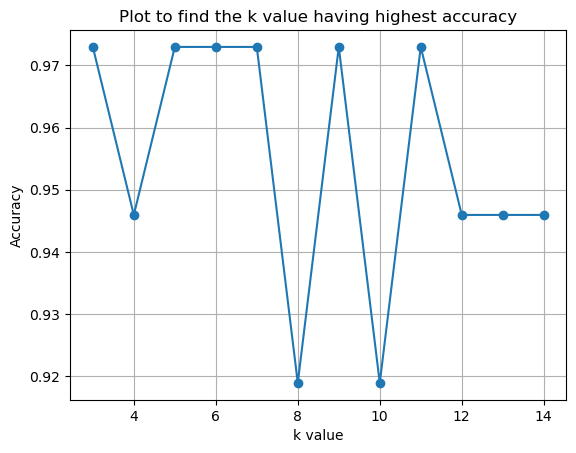

In [181]:
# plot k values versus accuracy to find out which value of k is having highest accuracy
plt.plot(neighbors, metric_k, 'o-') 

# display title
plt.title('Plot to find the k value having highest accuracy')

# plot label on x-axis
plt.xlabel('k value')

# plot label on y-axis
plt.ylabel('Accuracy')

# display grid
plt.grid()

from the above display, highest accuracy of 0.972972972972973, is found for k values = 3, 5, 6, 7, 9, 11

In [182]:
# using k value = 3, creating an instance
knn = KNeighborsClassifier(n_neighbors=3) 

# creating model with training data
knn_model = knn.fit(X_train, y_train) 

# finding the predicted values of test data using features of test data
y_pred_knn = knn_model.predict(X_test) 

E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [183]:
# displaying confusion matrix
knn_conf = confusion_matrix(y_test, y_pred_knn)

In [184]:
# Creating a dataframe for an array-formatted Confusion matrix
knn_conf_matrix = pd.DataFrame(knn_conf,
                     index = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
                     columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

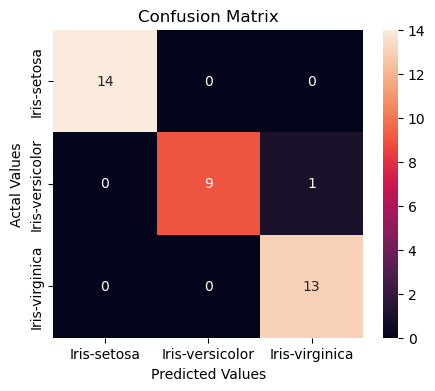

In [185]:
# Plotting the confusion matrix
plt.figure(figsize=(5,4))

# plotting heatmap
sns.heatmap(knn_conf_matrix, annot=True)

# display title
plt.title('Confusion Matrix')

# display title on y axis
plt.ylabel('Actal Values')

# display title on x axis
plt.xlabel('Predicted Values')

# display figure
plt.show()

~ calculate the TP, TN, FP, FN values for the class 'Iris-setosa'
* TP: The actual value and predicted value should be the same.
TP = 14
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 0 = 0
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 0 = 0
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 9 + 1 + 0 + 13 = 23

~ calculate the TP, TN, FP, FN values for the class 'Iris-versicolor'
* TP: The actual value and predicted value should be the same.
TP = 9
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 1 = 1
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 0 = 0
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 14 + 0 + 0 + 13 = 27

~ calculate the TP, TN, FP, FN values for the class 'Iris-virginica'
* TP: The actual value and predicted value should be the same.
TP = 13
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 0 = 0
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 1 = 1
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 14 + 0 + 0 + 9 = 23

In [186]:
# display accuracy score
print(accuracy_score(y_test, y_pred_knn))

# display precision score
print(precision_score(y_test, y_pred_knn, average='weighted'))

# display recall score
print(recall_score(y_test, y_pred_knn, average='weighted'))

# f1 score
print(f1_score(y_test, y_pred_knn, average='micro'))

0.972972972972973
0.9749034749034748
0.972972972972973
0.972972972972973


#### 3) SVM MODEL

##### (a) 'linear' kernel

In [187]:
# creating an instance for SVM using linear kernel
svm_lin = SVC(kernel = 'linear') 

In [188]:
# creating model using training data
svm_linmod = svm_lin.fit(X_train, y_train) 

In [189]:
# predict the target of the test data using the features of test data
y_pred_svmlin = svm_lin.predict(X_test) 

In [190]:
# displaying confusion matrix
svmlin_conf = confusion_matrix(y_test, y_pred_svmlin)

In [191]:
# Creating a dataframe for an array-formatted Confusion matrix
svmlin_conf_matrix = pd.DataFrame(svmlin_conf,
                     index = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
                     columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

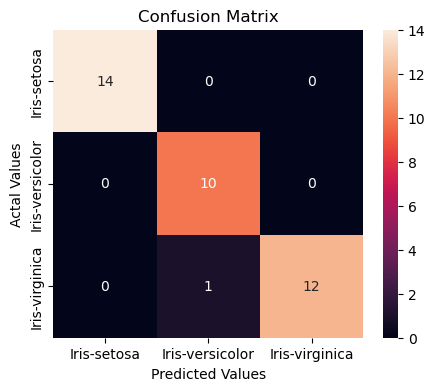

In [192]:
# Plotting the confusion matrix
plt.figure(figsize=(5,4))

# plotting heatmap
sns.heatmap(svmlin_conf_matrix, annot=True)

# display title
plt.title('Confusion Matrix')

# display title on y axis
plt.ylabel('Actal Values')

# display title on x axis
plt.xlabel('Predicted Values')

# display figure
plt.show()

~ calculate the TP, TN, FP, FN values for the class 'Iris-setosa'
* TP: The actual value and predicted value should be the same.
TP = 14
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 0 = 0
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 0 = 0
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 10 + 0 + 1 + 12 =23

~ calculate the TP, TN, FP, FN values for the class 'Iris-versicolor'
* TP: The actual value and predicted value should be the same.
TP = 10
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 0 = 0
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 1 = 1
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 14 + 0 + 0 + 12 = 26

~ calculate the TP, TN, FP, FN values for the class 'Iris-virginica'
* TP: The actual value and predicted value should be the same.
TP = 12
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 1 = 1
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 0 = 0
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 14 + 0 + 0 + 10 = 24

In [193]:
# display accuracy score
accuracy_score(y_test, y_pred_svmlin)

0.972972972972973

In [194]:
# precision score
print(precision_score(y_test, y_pred_svmlin, average='weighted'))

0.9754299754299754


In [195]:
# recall score
print(recall_score(y_test, y_pred_svmlin, average='weighted'))

0.972972972972973


In [196]:
# f1 score
print(f1_score(y_test, y_pred_svmlin, average='micro'))

0.972972972972973


##### (b) 'rbf' kernel

In [197]:
 # creating an instance for SVM  using rbf kernel
svm_rbf = SVC(kernel = 'rbf') 

In [198]:
# creating model using training data
svm_rbfmod = svm_rbf.fit(X_train, y_train) 

In [199]:
# predict the target of the test data using the features of test data
y_pred_svmrbf = svm_rbf.predict(X_test)

In [200]:
# displaying confusion matrix
svmrbf_conf = confusion_matrix(y_test, y_pred_svmrbf)

In [201]:
# Creating a dataframe for an array-formatted Confusion matrix
svmrbf_conf_matrix = pd.DataFrame(svmrbf_conf,
                     index = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
                     columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

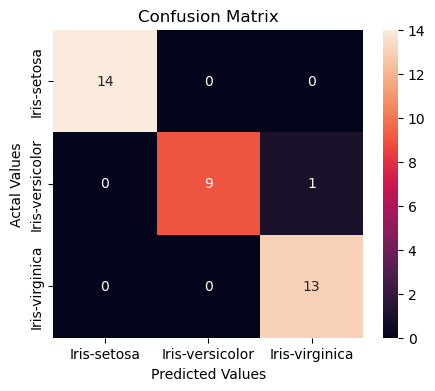

In [202]:
# Plotting the confusion matrix
plt.figure(figsize=(5,4))

# plotting heatmap
sns.heatmap(svmrbf_conf_matrix, annot=True)

# display title
plt.title('Confusion Matrix')

# display title on y axis
plt.ylabel('Actal Values')

# display title on x axis
plt.xlabel('Predicted Values')

# display figure
plt.show()

~ calculate the TP, TN, FP, FN values for the class 'Iris-setosa'
* TP: The actual value and predicted value should be the same.
TP = 14
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 0 = 0
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 0 = 0
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 9 + 1 + 0 + 13 = 23

~ calculate the TP, TN, FP, FN values for the class 'Iris-versicolor'
* TP: The actual value and predicted value should be the same.
TP = 9
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 1 = 1
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 0 = 0
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 14 + 0 + 0 + 13 = 27

~ calculate the TP, TN, FP, FN values for the class 'Iris-virginica'
* TP: The actual value and predicted value should be the same.
TP = 13
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 0 = 0
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 1 = 1
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 14 + 0 + 0 + 9 = 23

In [203]:
# display accuracy score
accuracy_score(y_test, y_pred_svmrbf)

0.972972972972973

In [204]:
# precision score
print(precision_score(y_test, y_pred_svmrbf, average='weighted'))

0.9749034749034748


In [205]:
# recall score
print(recall_score(y_test, y_pred_svmrbf, average='weighted'))

0.972972972972973


In [206]:
# f1 score
print(f1_score(y_test, y_pred_svmrbf, average='micro'))

0.972972972972973


##### (c) 'polynomial' kernel

In [207]:
# creating an instance for SVM  using 'polynomial' kernel
svm_poly = SVC(kernel='poly') 

In [208]:
# creating model using training data
svm_polmod = svm_poly.fit(X_train, y_train) 

In [209]:
# predict the target of the test data using the features of test data
y_pred_svmpol = svm_poly.predict(X_test)

In [210]:
# displaying confusion matrix
svmpol_conf = confusion_matrix(y_test, y_pred_svmpol)

In [211]:
# Creating a dataframe for an array-formatted Confusion matrix
svmpol_conf_matrix = pd.DataFrame(svmpol_conf,
                     index = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
                     columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

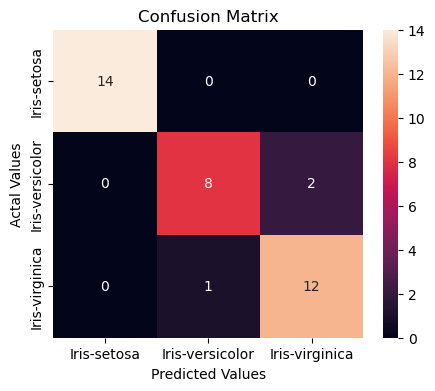

In [212]:
# Plotting the confusion matrix
plt.figure(figsize=(5,4))

# plotting heatmap
sns.heatmap(svmpol_conf_matrix, annot=True)

# display title
plt.title('Confusion Matrix')

# display title on y axis
plt.ylabel('Actal Values')

# display title on x axis
plt.xlabel('Predicted Values')

# display figure
plt.show()

~ calculate the TP, TN, FP, FN values for the class 'Iris-setosa'
* TP: The actual value and predicted value should be the same.
TP = 14
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 0 = 0
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 0 = 0
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 8 + 2 + 1 + 12 = 23

~ calculate the TP, TN, FP, FN values for the class 'Iris-versicolor'
* TP: The actual value and predicted value should be the same.
TP = 8
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 2 = 2
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 1 = 1
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 14 + 0 + 0 + 12 = 26

~ calculate the TP, TN, FP, FN values for the class 'Iris-virginica'
* TP: The actual value and predicted value should be the same.
TP = 12
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 1 = 1
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 2 = 2
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 14 + 0 + 0 + 8 = 22

In [213]:
# display accuracy score
accuracy_score(y_test, y_pred_svmpol)

0.918918918918919

In [214]:
# precision score
print(precision_score(y_test, y_pred_svmpol, average='weighted'))

0.9197769197769198


In [215]:
# recall score
print(recall_score(y_test, y_pred_svmpol, average='weighted'))

0.918918918918919


In [216]:
# f1 score
print(f1_score(y_test, y_pred_svmpol, average='micro'))

0.918918918918919


#### 4) DECISION TREE

In [217]:
# creating an instance for decision tree classifier
dec_tree = DecisionTreeClassifier(random_state=42) 

In [218]:
# creating model using training data 
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [219]:
# predict the target of the test data using the features of test data
y_pred_dectree = dec_tree.predict (X_test)

In [220]:
# displaying confusion matrix
dectree_conf = confusion_matrix(y_test, y_pred_dectree)

In [221]:
# Creating a dataframe for an array-formatted Confusion matrix
dectree_conf_matrix = pd.DataFrame(dectree_conf,
                     index = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
                     columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

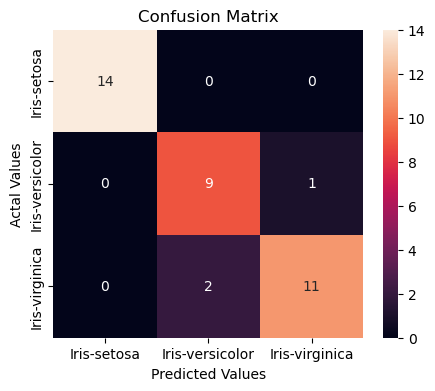

In [222]:
# Plotting the confusion matrix
plt.figure(figsize=(5,4))

# plotting heatmap
sns.heatmap(dectree_conf_matrix, annot=True)

# display title
plt.title('Confusion Matrix')

# display title on y axis
plt.ylabel('Actal Values')

# display title on x axis
plt.xlabel('Predicted Values')

# display figure
plt.show()

~ calculate the TP, TN, FP, FN values for the class 'Iris-setosa'
* TP: The actual value and predicted value should be the same.
TP = 14
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 0 = 0
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 0 = 0
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 9 + 1 + 2 + 11 = 23

~ calculate the TP, TN, FP, FN values for the class 'Iris-versicolor'
* TP: The actual value and predicted value should be the same.
TP = 9
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 1 = 1
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 2 = 2
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 14 + 0 + 0 + 11 = 25

~ calculate the TP, TN, FP, FN values for the class 'Iris-virginica'
* TP: The actual value and predicted value should be the same.
TP = 11
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 2 = 2
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 1 = 1
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 14 + 0 + 0 + 9 = 23

In [223]:
# display accuracy score
accuracy_score(y_test, y_pred_dectree)

0.918918918918919

In [224]:
# precision score
print(precision_score(y_test, y_pred_dectree, average='weighted'))

0.9215806715806715


In [225]:
# recall score
print(recall_score(y_test, y_pred_dectree, average='weighted'))

0.918918918918919


In [226]:
# f1 score
print(f1_score(y_test, y_pred_dectree, average='micro'))

0.918918918918919


#### 5) RANDOM FOREST

In [227]:
# creating an instance for random forest classifier
ran_for = RandomForestClassifier(random_state=42)

In [228]:
# creating model using training data 
ran_for.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [229]:
# predict the target of the test data using the features of test data
y_pred_ranfor = ran_for.predict (X_test)

In [230]:
# displaying confusion matrix
ranfor_conf = confusion_matrix(y_test, y_pred_ranfor)

In [231]:
# Creating a dataframe for an array-formatted Confusion matrix
ranfor_conf_matrix = pd.DataFrame(ranfor_conf,
                     index = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
                     columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

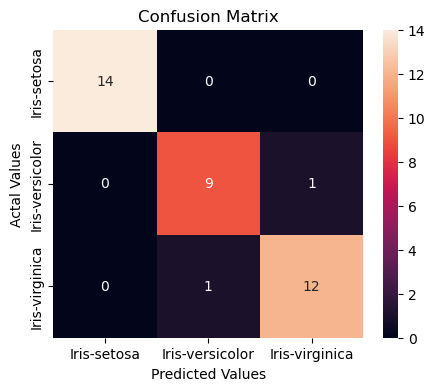

In [232]:
# Plotting the confusion matrix
plt.figure(figsize=(5,4))

# plotting heatmap
sns.heatmap(ranfor_conf_matrix, annot=True)

# display title
plt.title('Confusion Matrix')

# display title on y axis
plt.ylabel('Actal Values')

# display title on x axis
plt.xlabel('Predicted Values')

# display figure
plt.show()

~ calculate the TP, TN, FP, FN values for the class 'Iris-setosa'
* TP: The actual value and predicted value should be the same.
TP = 14
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 0 = 0
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 0 = 0
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 9 + 1 + 1 + 12 = 23

~ calculate the TP, TN, FP, FN values for the class 'Iris-versicolor'
* TP: The actual value and predicted value should be the same.
TP = 9
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 1 = 1
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 1 = 1
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 14 + 0 + 0 + 12 = 26

~ calculate the TP, TN, FP, FN values for the class 'Iris-virginica'
* TP: The actual value and predicted value should be the same.
TP = 12
* FN: The sum of values of corresponding rows except the TP value
FN = 0 + 1 = 1
* FP : The sum of values of corresponding column except the TP value
FP = 0 + 1 = 1
* TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.
TN = 14 + 0 + 0 + 9 = 23

In [233]:
# display accuracy score
accuracy_score(y_test, y_pred_ranfor)

0.9459459459459459

In [234]:
# precision score
print(precision_score(y_test, y_pred_ranfor, average='weighted'))

0.9459459459459459


In [235]:
# recall score
print(recall_score(y_test, y_pred_ranfor, average='weighted'))

0.9459459459459459


In [236]:
# f1 score
print(f1_score(y_test, y_pred_ranfor, average='micro'))

0.9459459459459459


ACCURACY SCORE
******
1) LOGISTIC REGRESSION - 0.972972972972973


2) kNN MODEL - 0.972972972972973

3) SVM MODEL,  (a) 'linear' kernel - 0.972972972972973,

               (b) 'rbf' kernel - 0.972972972972973,
               
               (c) 'polynomial' kernel - 0.918918918918919
               
4) DECISION TREE - 0.918918918918919

5) RANDOM FOREST - 0.9459459459459459

~ Highest accuracy score of 0.972972972972973 and highest recall score of 0.972972972972973 are obtained for Logistic Regression model, kNN model, SVM models using linear kernel and rbf kernels.

~ Logistic Regression model and  SVM model using linear kernel are having the same confusion matrix while kNN model and SVM model using rbf kernel are having the same confusion matrix.

~ Logistic Regression model and  SVM model using linear kernel are performing better and gives  better results because of better recall scores.